# Download Data

In [1]:
!pip install SciFiReaders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 681.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 946.1/946.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 34.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall:

In [14]:
!pip install igor2

# Import .ibw

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import SciFiReaders
import glob
from scipy.optimize import curve_fit

You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.


In [7]:
!gdown https://drive.google.com/uc?id=166Mxe2eG3wEF6ukcp1mc-NAwbsX9IGOS

Downloading...
From: https://drive.google.com/uc?id=166Mxe2eG3wEF6ukcp1mc-NAwbsX9IGOS
To: /content/JiaweiGONG.zip
100% 4.38M/4.38M [00:00<00:00, 254MB/s]


In [9]:
!unzip /content/JiaweiGONG.zip

Archive:  /content/JiaweiGONG.zip
   creating: Jiawei GONG/20240531/
   creating: Jiawei GONG/20240531/3C_CB_SnO2/
  inflating: Jiawei GONG/20240531/3C_CB_SnO2/P3C_CB_SnO20000.ibw  
  inflating: Jiawei GONG/20240531/3C_CB_SnO2/P3C_CB_SnO20001.ibw  
  inflating: Jiawei GONG/20240531/3C_CB_SnO2/P3C_CB_SnO20002.ibw  
  inflating: Jiawei GONG/20240531/3C_CB_SnO2/P3C_CB_SnO20003.ibw  
  inflating: Jiawei GONG/20240531/3C_CB_SnO2/Topo0000.ibw  
  inflating: Jiawei GONG/20240531/3C_CB_SnO2/Topo0001.ibw  


In [2]:
path = "/content/Jiawei GONG/20240531/3C_CB_SnO2/"
os.chdir(path)

In [3]:
rawdata = "Topo0000.ibw"

In [4]:
reader = SciFiReaders.IgorIBWReader(rawdata)
data = reader.read()

In [5]:
data

[sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
  data contains: HeightRetrace (m)
  and Dimensions: 
 x:  x (m) of size (256,)
 y:  y (m) of size (256,),
 sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
  data contains: DeflectionRetrace (m)
  and Dimensions: 
 x:  x (m) of size (256,)
 y:  y (m) of size (256,),
 sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
  data contains: ZSensorRetrace (m)
  and Dimensions: 
 x:  x (m) of size (256,)
 y:  y (m) of size (256,)]

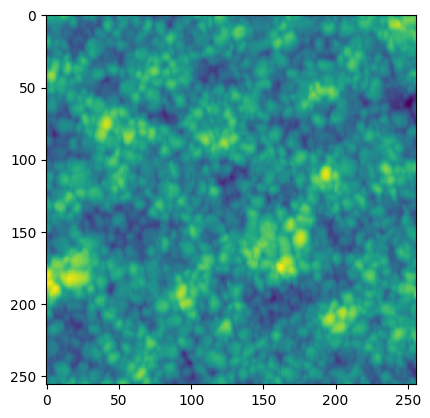

In [6]:
height = data[0]

plt.imshow(height)

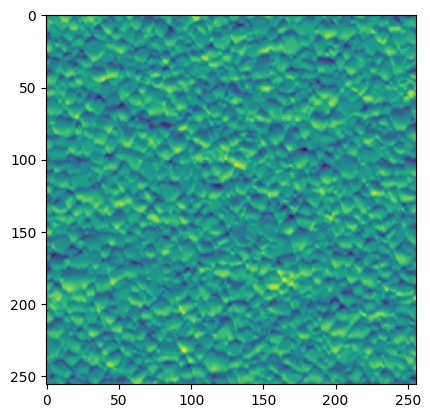

In [7]:
deflection = data[1]

plt.imshow(deflection)

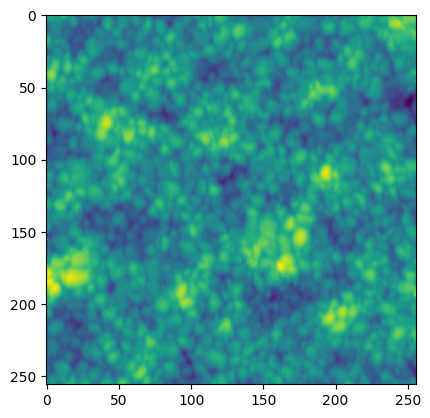

In [8]:
zsensor = data[2]
plt.imshow(zsensor)

In [9]:
zsensor

sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: ZSensorRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,)

(array([6.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 1.800e+01,
        1.300e+01, 1.800e+01, 2.500e+01, 4.100e+01, 4.700e+01, 7.600e+01,
        9.000e+01, 7.100e+01, 1.340e+02, 1.620e+02, 2.270e+02, 2.510e+02,
        3.750e+02, 4.120e+02, 4.450e+02, 5.600e+02, 6.250e+02, 7.710e+02,
        8.300e+02, 9.030e+02, 9.810e+02, 1.123e+03, 1.236e+03, 1.322e+03,
        1.410e+03, 1.514e+03, 1.597e+03, 1.622e+03, 1.715e+03, 1.813e+03,
        1.950e+03, 1.888e+03, 1.992e+03, 2.026e+03, 2.164e+03, 2.146e+03,
        2.149e+03, 2.142e+03, 2.154e+03, 2.007e+03, 1.936e+03, 1.831e+03,
        1.752e+03, 1.695e+03, 1.552e+03, 1.494e+03, 1.362e+03, 1.362e+03,
        1.208e+03, 1.125e+03, 1.043e+03, 9.080e+02, 7.940e+02, 6.980e+02,
        6.610e+02, 6.010e+02, 4.950e+02, 4.630e+02, 4.250e+02, 3.420e+02,
        3.140e+02, 3.200e+02, 2.560e+02, 2.200e+02, 2.030e+02, 1.620e+02,
        1.620e+02, 1.330e+02, 1.090e+0

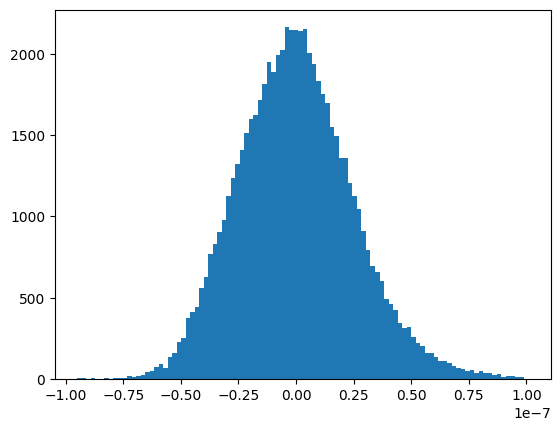

In [10]:
zdis = np.array(zsensor)
plt.hist(zdis.flatten(), bins=100);